/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Train on 100 samples, validate on 40 samples
Epoch 1/1
 - 6s - loss: 0.1363 - val_loss: 0.2191


/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Train on 100 samples, validate on 40 samples
Epoch 1/1
 - 6s - loss: 0.1506 - val_loss: 0.1623


/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Train on 100 samples, validate on 40 samples
Epoch 1/1
 - 6s - loss: 0.1826 - val_loss: 0.0480


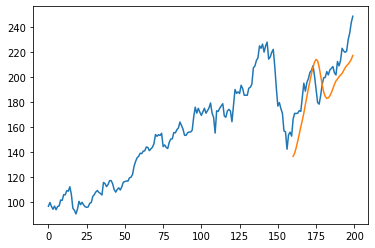

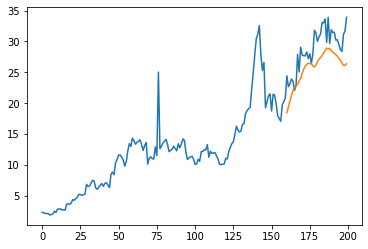

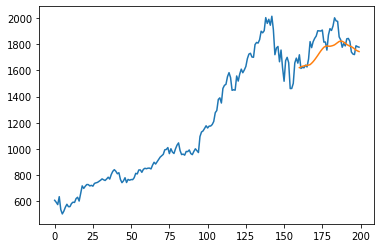

In [127]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def run_lstm(df1):
    split_point=160
    new_data = df1[['Date', 'Close']]
    new_data.index = new_data.Date
    new_data.drop('Date', axis=1, inplace=True)

    dataset = new_data.values
    train = dataset[0:split_point,:]
    valid = dataset[split_point:,:]
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(dataset)

    len(scaled_data)

    x_train, y_train = [], []
    for i in range(60,len(train)):
        x_train.append(scaled_data[i-60:i,0])
        y_train.append(scaled_data[i,0])
    x_train, y_train = np.array(x_train), np.array(y_train)

    x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))


    valid_inputs = new_data[len(new_data) - len(valid) - 60:].values
    valid_inputs = valid_inputs.reshape(-1,1)
    valid_inputs  = scaler.transform(valid_inputs)

    x_valid, y_valid = [], []
    for i in range(60,valid_inputs.shape[0]):
        x_valid.append(valid_inputs[i-60:i,0])
        y_valid.append(valid_inputs[i,0])
    x_valid, y_valid = np.array(x_valid), np.array(y_valid)

    x_valid = np.reshape(x_valid, (x_valid.shape[0],x_valid.shape[1],1))


    # create and fit the LSTM network
    model = Sequential()
    model.add(LSTM(units=100, return_sequences=True, input_shape=(x_train.shape[1],1)))
    model.add(LSTM(units=100))
    model.add(Dense(1))

    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2, validation_data=(x_valid, y_valid))

    inputs = new_data[len(new_data) - len(valid) - 60:].values
    inputs = inputs.reshape(-1,1)
    inputs  = scaler.transform(inputs)

    X_test = []
    for i in range(60,inputs.shape[0]):
        X_test.append(inputs[i-60:i,0])
    X_test = np.array(X_test)

    X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))


    closing_price = model.predict(X_test)
    closing_price = scaler.inverse_transform(closing_price)

    len(closing_price)

    len(dataset)

    len(closing_price)
    fig, ax = plt.subplots()
    ax.plot(list(range(0,200)),dataset)
    ax.plot(list(range(split_point,200)),closing_price)

    rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
    rms
    return model

prediction_dates = ["11/1/19",
"11/8/19",
"11/15/19",
"11/22/19",
"11/29/19",
"12/6/19",
"12/13/19",
"12/20/19",
"12/27/19",
"1/3/20",
"1/10/20",
"1/17/20",
"1/24/20",
"1/31/20"]

prediction_dates = pd.DataFrame(pd.to_datetime(pd.DataFrame(prediction_dates)[0], format='%m/%d/%y'))
prediction_dates
scaler = StandardScaler()
prediction_dates = scaler.fit_transform(prediction_dates)
prediction_dates

df = pd.read_csv('../data/stock_series_train.csv')
df['Date'] = pd.to_datetime(df['Date'])

df1 = df[df['stock_id']==2]

models = []

for i in range(1,4):
    mdl = run_lstm(df[df['stock_id']==i])
    models.append(mdl)

   

for m in models:
    print(m)